1. Take an imbalanced data
2. Data preprocessing
3. Train the model using KNN
4. Evaluation metrics
5. Handle the imbalanced data using SMOTE technique
6. Again, train the model using KNN
7. Evaulation metrics after handling

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset 

In [3]:
df=pd.read_csv("car_evaluation.csv")
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [7]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'outcome'], dtype='object')

In [8]:
df.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.989583
std,1.118358,1.627039
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,6.000000
max,5.000000,6.000000


In [9]:
df.isnull().any()

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
outcome     False
dtype: bool

In [10]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [12]:
df.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

Clearly, the above data set is imbalanced

### Data visualization 

<AxesSubplot:>

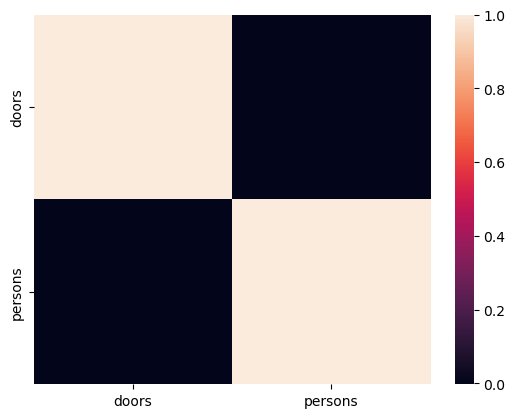

In [13]:
sns.heatmap(df.corr())

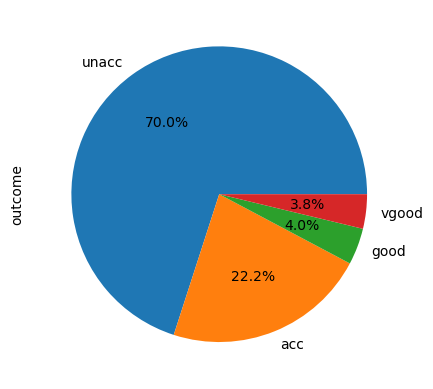

In [19]:
df.outcome.value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [20]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Label encoding 

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
columns=["buying","maint","lug_boot","safety"]
df[columns]=df[columns].apply(le.fit_transform)

In [23]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


### Splitting into dependent and independent variables

In [24]:
x=df.drop(columns="outcome")
x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [25]:
y=df["outcome"]
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: outcome, dtype: object

Feature scaling is not required in this case

### Splitting into training and testing data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

### Model building 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred=knn.predict(x_test)
y_pred

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'good', 'unacc', 'vgood', 'acc',


In [36]:
y_test.head()

1318    unacc
124     unacc
648     unacc
249     unacc
1599    unacc
Name: outcome, dtype: object

In [42]:
#Random value prediction
knn.predict([[3,3,2,2,2,1]])

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['unacc'], dtype=object)

In [43]:
#Random value prediction
knn.predict([[1,1,5,6,0,2]])

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['good'], dtype=object)

### Performance metrics

In [44]:
from sklearn.metrics import accuracy_score,classification_report

In [45]:
accuracy_score(y_pred,y_test)

0.9075144508670521

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.80      0.81      0.81        79
        good       0.67      0.24      0.35        17
       unacc       0.95      0.99      0.97       240
       vgood       0.89      0.80      0.84        10

    accuracy                           0.91       346
   macro avg       0.83      0.71      0.74       346
weighted avg       0.90      0.91      0.90       346



In [47]:
pd.crosstab(y_test,y_pred)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,64,2,12,1
good,12,4,1,0
unacc,2,0,238,0
vgood,2,0,0,8


### Handling imbalanced data 

In [50]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [51]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [53]:
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [55]:
#Before SMOTE
y_train.value_counts()

unacc    970
acc      305
vgood     55
good      52
Name: outcome, dtype: int64

In [57]:
#After SMOTE
y_train_smote.value_counts()

unacc    970
acc      970
good     970
vgood    970
Name: outcome, dtype: int64

### Model building on balanced dataset

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_smote=KNeighborsClassifier()
knn_smote.fit(x_train_smote,y_train_smote)

KNeighborsClassifier()

In [63]:
y_pred1=knn_smote.predict(x_test)
y_pred1

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'good',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'good', 'acc', 'unacc', 'acc', 'good', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'good', 'acc', 'acc', 'good', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'vgood', 'acc', 'unacc', 'acc',
     

### Evaluation metrics on balanced dataset 

In [64]:
accuracy_score(y_pred1,y_test)

0.8583815028901735

In [65]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         acc       0.68      0.80      0.74        79
        good       0.60      0.71      0.65        17
       unacc       0.95      0.90      0.92       240
       vgood       0.88      0.70      0.78        10

    accuracy                           0.86       346
   macro avg       0.78      0.77      0.77       346
weighted avg       0.87      0.86      0.86       346



In [66]:
pd.crosstab(y_test,y_pred1)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,63,6,10,0
good,4,12,1,0
unacc,22,2,215,1
vgood,3,0,0,7
